In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO


Muat Model

In [2]:
# Load model yang sudah disimpan
model = load_model('../models/garbage_classifier_final1.keras')


Fungsi Prediksi

In [3]:
def predict_from_url(url):
    try:
        # Download gambar dari URL
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        
        # Pastikan resize ke dimensi yang tepat (512x384)
        target_size = (512, 384)
        img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
        
        # Konversi ke array dengan dimensi yang benar
        img_array = img_to_array(img_resized)
        
        # Pastikan shape sesuai dengan yang diharapkan model
        if img_array.shape != (384, 512, 3):
            img_array = img_array.reshape(384, 512, 3)
            
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        # Sesuaikan dimensi akhir
        if img_array.shape != (1, 512, 384, 3):
            img_array = np.transpose(img_array, (0, 2, 1, 3))
            
        # Lanjutkan dengan prediksi
        predictions = model.predict(img_array)
        
        # Label kelas sesuai dengan struktur folder
        class_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
        predicted_class = class_labels[np.argmax(predictions[0])]
        confidence = np.max(predictions[0])
        
        # Tampilkan gambar dan hasil prediksi
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(img_resized)
        plt.title(f'Resized Image\nPredicted: {predicted_class}\nConfidence: {confidence:.2%}')
        plt.axis('off')
        plt.show()
        
        # Tampilkan probabilitas untuk setiap kelas
        print("\nProbabilitas untuk setiap kelas:")
        for label, prob in zip(class_labels, predictions[0]):
            print(f"{label}: {prob:.2%}")
            
    except Exception as e:
        print(f"Error: {str(e)}")


Penggunaan 

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


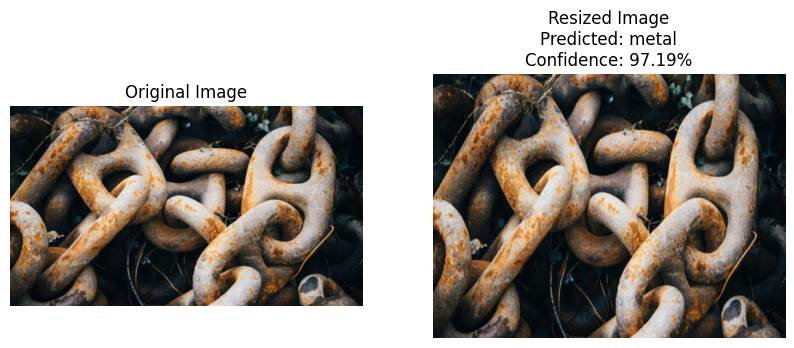


Probabilitas untuk setiap kelas:
cardboard: 0.29%
glass: 0.12%
metal: 97.19%
paper: 2.36%
plastic: 0.03%
trash: 0.02%


In [4]:
# Masukkan URL gambar yang ingin diprediksi
test_image_url = "https://cdn.timesmedia.co.id/images/2021/05/23/sampah-logam.jpg"

# Lakukan prediksi
predict_from_url(test_image_url)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


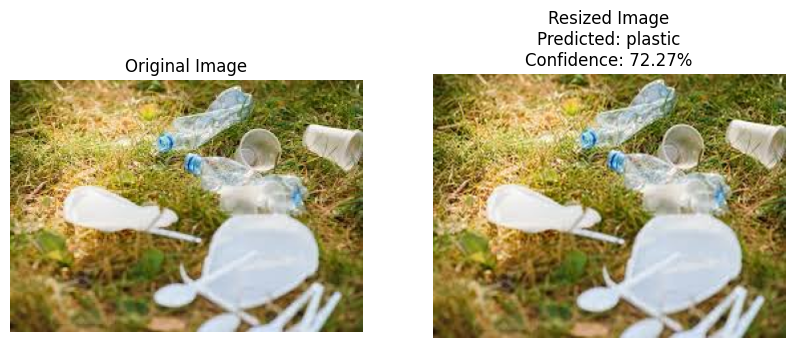


Probabilitas untuk setiap kelas:
cardboard: 7.53%
glass: 16.33%
metal: 0.03%
paper: 3.66%
plastic: 72.27%
trash: 0.18%


In [5]:

# Masukkan URL gambar yang ingin diprediksi
test_image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6N5nFcKMU67zIsNmXfqiFWVhhfQzIT1oViw&s"

# Lakukan prediksi
predict_from_url(test_image_url)

